In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [54]:
df_dc = pd.read_csv('dc-wikia-data.csv')

In [55]:
df_dc.head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [56]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
page_id             6896 non-null int64
name                6896 non-null object
urlslug             6896 non-null object
ID                  4883 non-null object
ALIGN               6295 non-null object
EYE                 3268 non-null object
HAIR                4622 non-null object
SEX                 6771 non-null object
GSM                 64 non-null object
ALIVE               6893 non-null object
APPEARANCES         6541 non-null float64
FIRST APPEARANCE    6827 non-null object
YEAR                6827 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [57]:
print("Unique IDs: ", df_dc.ID.unique())
print("Unique IDs: ", df_dc.ID.nunique())

Unique IDs:  ['Secret Identity' 'Public Identity' nan 'Identity Unknown']
Unique IDs:  3


In [58]:
# The Column Name urlslug is alomost same as the name column so dropping it.

In [59]:
df_dc = df_dc.drop('urlslug' ,axis = 1)

In [60]:
df_dc.head(5)

,page_id,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [61]:
df_dc = df_dc.drop('page_id', axis = 1)

In [62]:
df_dc.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [63]:
# Converting the First Appearance to Time Stamp

In [64]:
print(df_dc['ALIVE'].unique())

['Living Characters' 'Deceased Characters' nan]


In [65]:
df_dc.isnull().sum()

name                   0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [66]:
df_dc = df_dc.set_index(['ID'])

In [67]:
df_dc.head()

,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
ID,,,,,,,,,,
Secret Identity,Batman (Bruce Wayne),Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
Secret Identity,Superman (Clark Kent),Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
Secret Identity,Green Lantern (Hal Jordan),Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
Public Identity,James Gordon (New Earth),Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
Secret Identity,Richard Grayson (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [68]:
#Feature Engineering

In [69]:
#Find Total Null Values

In [81]:
df_dc.isnull()

,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
ID,,,,,,,,,,
Secret Identity,False,False,False,False,False,True,False,False,False,False
Secret Identity,False,False,False,False,False,True,False,False,False,False
Secret Identity,False,False,False,False,False,True,False,False,False,False
Public Identity,False,False,False,False,False,True,False,False,False,False
Secret Identity,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
Public Identity,False,False,True,True,False,True,False,True,True,True
Public Identity,False,False,True,True,False,True,False,True,True,True
Public Identity,False,False,True,True,False,True,False,True,True,True


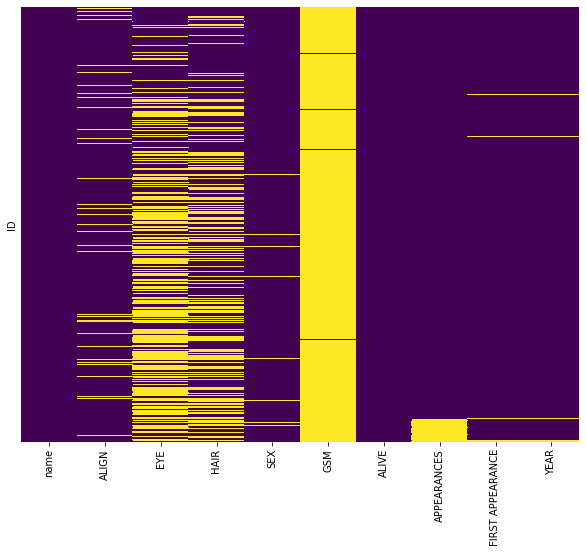

In [78]:
plt.figure(figsize = (10,8))
sns.heatmap(df_dc.isnull(), cbar = False, yticklabels=False, cmap = 'viridis')

# THE GSM Column is almost empty so it is better to remove it from the DataSet

In [19]:
df_dc = df_dc.drop('GSM', axis = 1)

In [20]:
df_dc.head()

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
ID,,,,,,,,,
Secret Identity,Batman (Bruce Wayne),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,"1939, May",1939.0
Secret Identity,Superman (Clark Kent),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,"1986, October",1986.0
Secret Identity,Green Lantern (Hal Jordan),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,"1959, October",1959.0
Public Identity,James Gordon (New Earth),Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,"1987, February",1987.0
Secret Identity,Richard Grayson (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,"1940, April",1940.0


In [21]:
#Converting the Year to int64 format.

In [22]:
#Filling the YEAR VALUES using imputation methods

In [23]:
df_dc['YEAR'].fillna(method = 'ffill', inplace = True)

In [24]:
df_dc['YEAR'] = df_dc['YEAR'].astype('int64')

In [25]:
df_dc.head()

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
ID,,,,,,,,,
Secret Identity,Batman (Bruce Wayne),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,"1939, May",1939
Secret Identity,Superman (Clark Kent),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,"1986, October",1986
Secret Identity,Green Lantern (Hal Jordan),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,"1959, October",1959
Public Identity,James Gordon (New Earth),Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,"1987, February",1987
Secret Identity,Richard Grayson (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,"1940, April",1940


In [26]:
df_dc['APPEARANCES'] = df_dc['APPEARANCES'].fillna(method = 'ffill')

In [27]:
df_dc['APPEARANCES'] = df_dc['APPEARANCES'].astype('int64')

In [28]:
df_dc.head(20)

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
ID,,,,,,,,,
Secret Identity,Batman (Bruce Wayne),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093,"1939, May",1939
Secret Identity,Superman (Clark Kent),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496,"1986, October",1986
Secret Identity,Green Lantern (Hal Jordan),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565,"1959, October",1959
Public Identity,James Gordon (New Earth),Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316,"1987, February",1987
Secret Identity,Richard Grayson (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237,"1940, April",1940
Public Identity,Wonder Woman (Diana Prince),Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,1231,"1941, December",1941
Public Identity,Aquaman (Arthur Curry),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1121,"1941, November",1941
Secret Identity,Timothy Drake (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1095,"1989, August",1989
Public Identity,Dinah Laurel Lance (New Earth),Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1075,"1969, November",1969


## Visualizing the Number of Secret Identity and Public Identity

In [29]:
df_dc.index.value_counts()

Public Identity     2466
Secret Identity     2408
Identity Unknown       9
Name: ID, dtype: int64

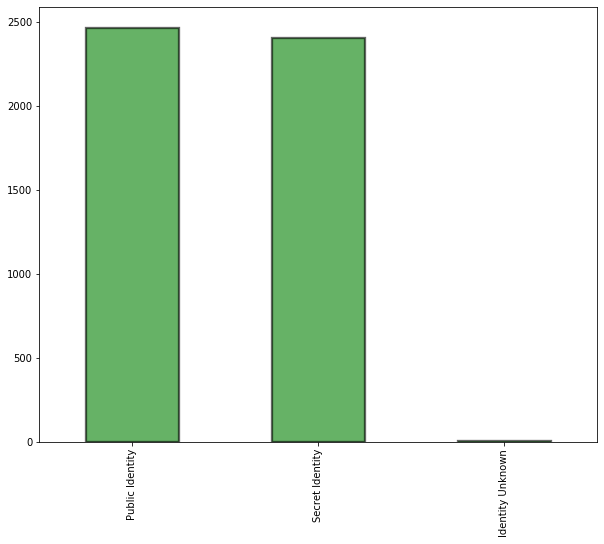

In [30]:
plt.figure(figsize = (10,8))
df_dc.index.value_counts().plot.bar(color = 'green', alpha = 0.6, linewidth = 2.3, edgecolor = 'black')

## Visualizing the Number of Unique Characters

In [31]:
df_dc['ALIGN'].value_counts()

Bad Characters        2895
Good Characters       2832
Neutral Characters     565
Reformed Criminals       3
Name: ALIGN, dtype: int64

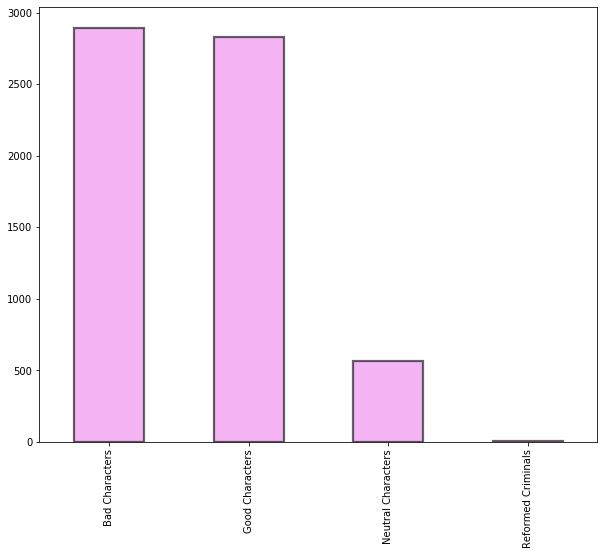

In [32]:
plt.figure(figsize = (10,8))
df_dc['ALIGN'].value_counts().plot.bar(color = 'violet', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

In [33]:
df_dc.columns

Index(['name', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES',
       'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

In [34]:
df_dc.columns = ['Names', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES',
       'FIRST_APPEARANCE', 'YEAR']

In [35]:
df_dc.head()

,Names,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST_APPEARANCE,YEAR
ID,,,,,,,,,
Secret Identity,Batman (Bruce Wayne),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093,"1939, May",1939
Secret Identity,Superman (Clark Kent),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496,"1986, October",1986
Secret Identity,Green Lantern (Hal Jordan),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565,"1959, October",1959
Public Identity,James Gordon (New Earth),Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316,"1987, February",1987
Secret Identity,Richard Grayson (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237,"1940, April",1940


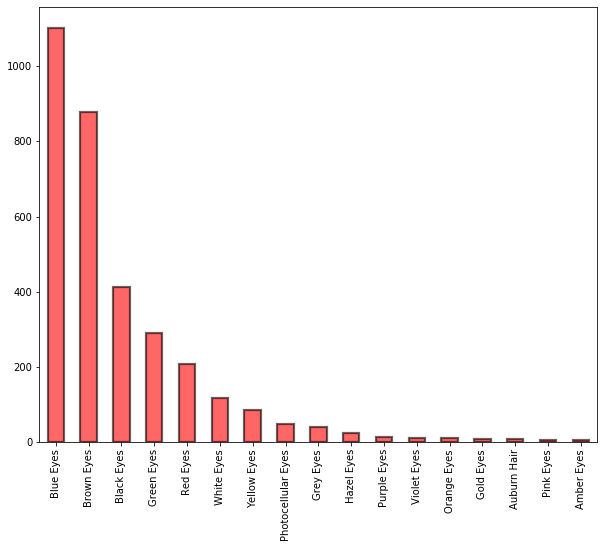

In [36]:
plt.figure(figsize = (10,8))
df_dc['EYE'].value_counts().plot.bar(color = 'red', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

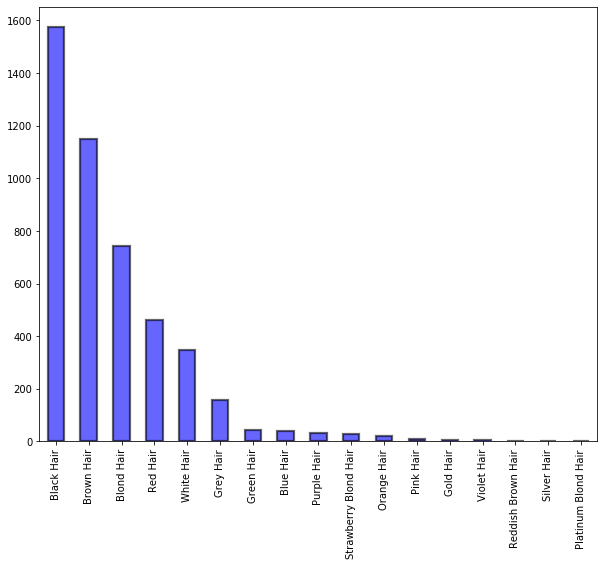

In [37]:
plt.figure(figsize = (10,8))
df_dc['HAIR'].value_counts().plot.bar(color = 'blue', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

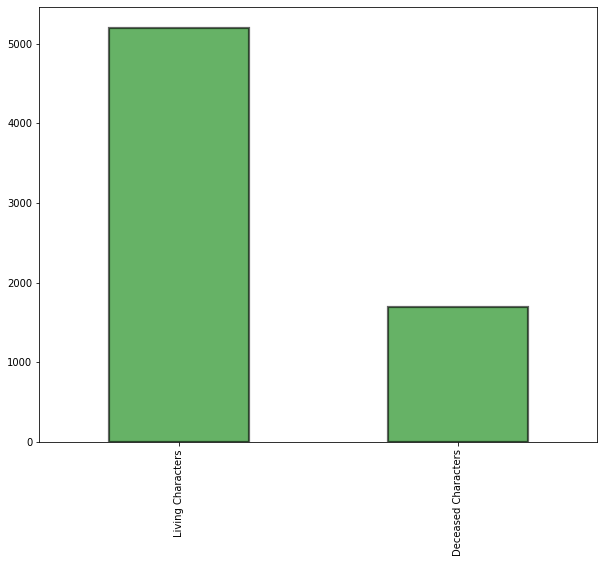

In [38]:
plt.figure(figsize = (10,8))
df_dc['ALIVE'].value_counts().plot.bar(color = 'green', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

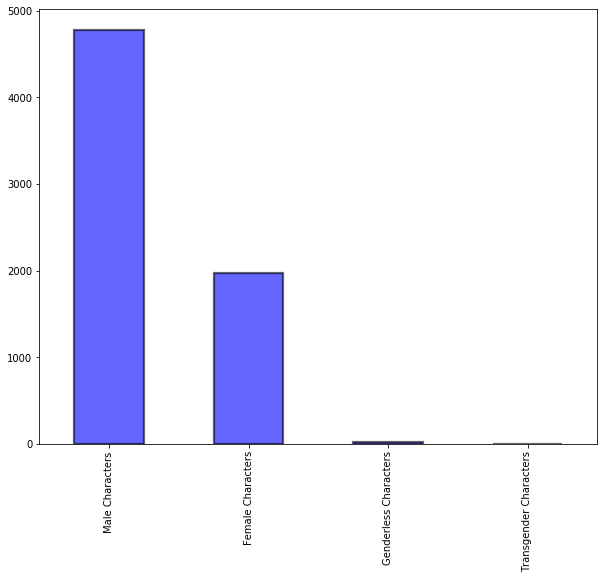

In [39]:
plt.figure(figsize = (10,8))
df_dc['SEX'].value_counts().plot.bar(color = 'blue', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

In [40]:
df_dc.head()

,Names,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST_APPEARANCE,YEAR
ID,,,,,,,,,
Secret Identity,Batman (Bruce Wayne),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093,"1939, May",1939
Secret Identity,Superman (Clark Kent),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496,"1986, October",1986
Secret Identity,Green Lantern (Hal Jordan),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565,"1959, October",1959
Public Identity,James Gordon (New Earth),Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316,"1987, February",1987
Secret Identity,Richard Grayson (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237,"1940, April",1940


In [41]:
df_dc.reset_index(inplace = True)

In [42]:
male = df_dc[df_dc['SEX'] == "Male Characters" ]['Names'].count()

In [43]:
female = df_dc[df_dc['SEX'] == "Female Characters"]['Names'].count()

In [44]:
other = df_dc[df_dc['SEX'] == "Genderless Characters"]['Names'].count()

In [45]:
trans = df_dc[df_dc['SEX'] == "Transgender Characters"]['Names'].count()

In [50]:
df_dc.head()

,ID,Names,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST_APPEARANCE,YEAR
0,Secret Identity,Batman (Bruce Wayne),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093,"1939, May",1939
1,Secret Identity,Superman (Clark Kent),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496,"1986, October",1986
2,Secret Identity,Green Lantern (Hal Jordan),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565,"1959, October",1959
3,Public Identity,James Gordon (New Earth),Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316,"1987, February",1987
4,Secret Identity,Richard Grayson (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237,"1940, April",1940
